### Exploratory Data Analysis on Spotify 2023 Dataset

In [2]:
# Import related python modules

from matplotlib import pyplot  as plt
import seaborn as sns
import pandas as pd

In [3]:
# Read the Spotify 2023 dataset, specifying 'ISO-8859-1' encoding to handle special characters in text
spotify_data = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

In [4]:
spotify_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### Guide questions
#### Overview Of Data Set
1. How many rows and columns does the dataset contain?
   - The data set has 953 rows and 24 columns.
2. What are the data types of each column? Are there any missing values?

In [6]:
# Display data types and count missing values in each column
data_types = spotify_data.dtypes
missing_values = spotify_data.isnull().sum()

# Combine the data types and missing values into a DataFrame for a clearer view
data_overview = pd.DataFrame({"Data Type": data_types, "Missing Values": missing_values})
print(data_overview)

                     Data Type  Missing Values
track_name              object               0
artist(s)_name          object               0
artist_count             int64               0
released_year            int64               0
released_month           int64               0
released_day             int64               0
in_spotify_playlists     int64               0
in_spotify_charts        int64               0
streams                 object               0
in_apple_playlists       int64               0
in_apple_charts          int64               0
in_deezer_playlists     object               0
in_deezer_charts         int64               0
in_shazam_charts        object              50
bpm                      int64               0
key                     object              95
mode                    object               0
danceability_%           int64               0
valence_%                int64               0
energy_%                 int64               0
acousticness_

   - Object (Text): track_name, artist(s)_name, streams, in_deezer_playlists, in_shazam_charts, key, mode
   - Integer: artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, in_apple_playlists, in_apple_charts, in_deezer_charts, bpm, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%
   - key has missing values (95 entries).
   - in_shazam_charts has 50 missing values.

#### Top Performers
1. Which track has the highest number of streams? Display the top 5 most streamed tracks.
   - Blinding Lights by The Weeknd: 3.70 billion stream
   - Shape of You by Ed Sheeran: 3.56 billion streams
   - Someone You Loved by Lewis Capaldi: 2.89 billion streams
   - Dance Monkey by Tones and I: 2.86 billion streams
   - Sunflower by Post Malone, Swae Lee: 2.81 billion streams

/var/folders/qh/wcjkvl094jdcznk98824qx9h0000gn/T/ipykernel_87394/441231862.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams', y='track_name', data=top_streamed_tracks, palette='viridis')


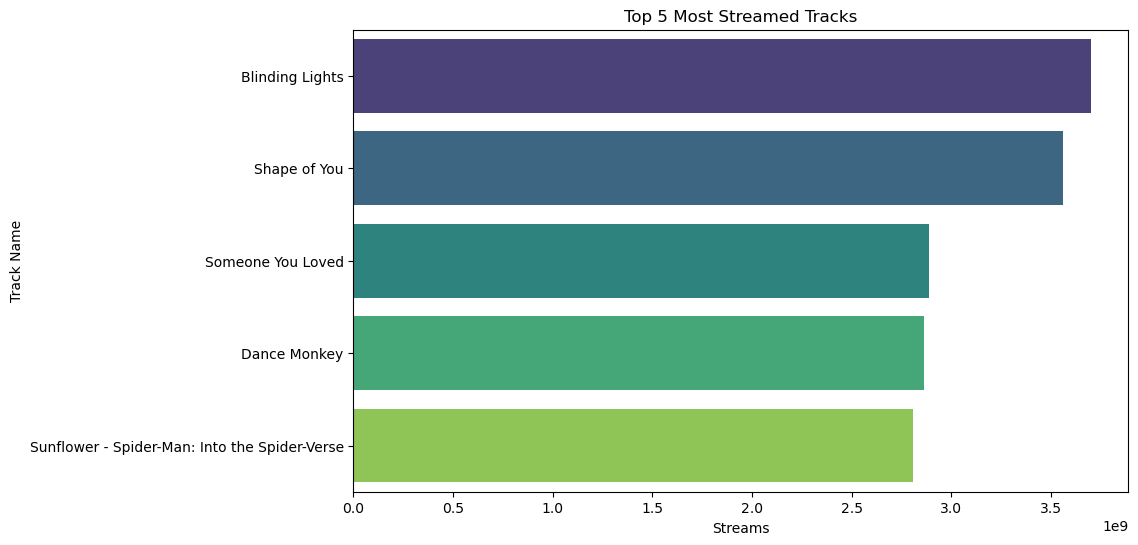

In [9]:
# Convert 'streams' column to string type (if it's not already a string)
spotify_data['streams'] = spotify_data['streams'].astype(str)

# Filter out rows with non-numeric values in 'streams' and convert 'streams' to an integer
spotify_data_cleaned = spotify_data[spotify_data['streams'].str.replace(',', '').str.isnumeric()].copy()

# Remove commas and convert 'streams' to integers
spotify_data_cleaned.loc[:, 'streams'] = spotify_data_cleaned['streams'].str.replace(',', '').astype(int)

# Sort by 'streams' in descending order and select the top 5 tracks
top_streamed_tracks = spotify_data_cleaned.sort_values(by='streams', ascending=False).head(5)

# Plot the top 5 streamed tracks
plt.figure(figsize=(10, 6))
sns.barplot(x='streams', y='track_name', data=top_streamed_tracks, palette='viridis')

# Add labels and title
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.title('Top 5 Most Streamed Tracks')

# Display the plot
plt.show()


2. Who are the top 5 most frequent artists based on the number of tracks in the dataset?

/var/folders/qh/wcjkvl094jdcznk98824qx9h0000gn/T/ipykernel_87394/447102304.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


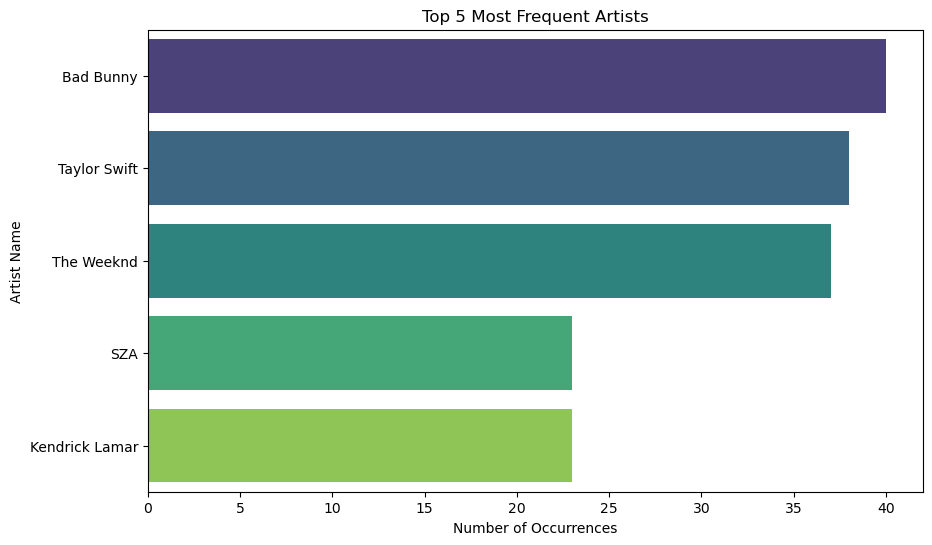

In [11]:
# Split the artist(s) names by commas and expand them into individual rows
spotify_data_exploded = spotify_data.assign(artist=spotify_data['artist(s)_name'].str.split(', ')).explode('artist')

# Count occurrences of each artist and get the top 5
top_artists = spotify_data_exploded['artist'].value_counts().head(5)

# Plot the top 5 artists
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')

# Add labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Artist Name')
plt.title('Top 5 Most Frequent Artists')

# Display the plot
plt.show()

- Bad Bunny: 40 tracks
- Taylor Swift: 38 tracks
- The Weeknd: 37 tracks
- SZA: 23 tracks
- Kendrick Lamar: 23 tracks

#### Temporal Trends
1. Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

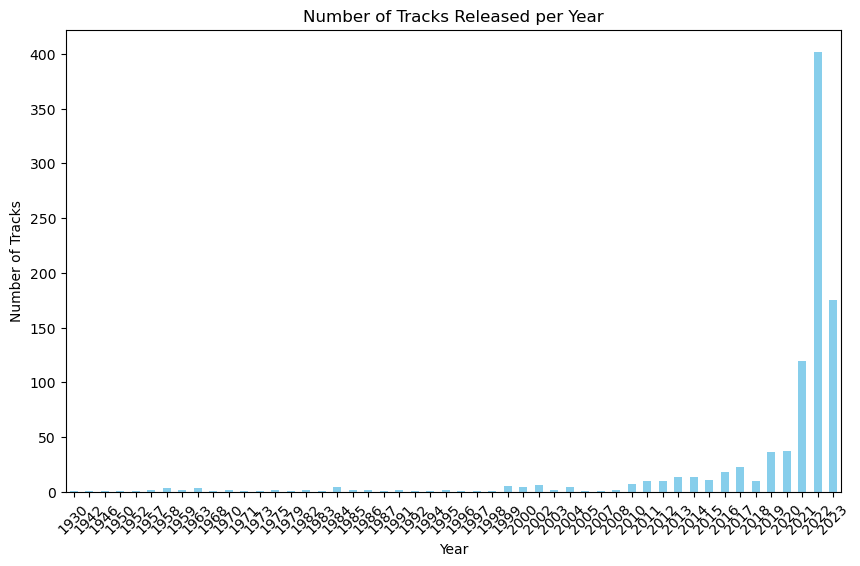

In [14]:
# Group by 'released_year' and count the number of tracks per year
tracks_per_year = spotify_data.groupby('released_year').size()

# Plot the number of tracks released per year
plt.figure(figsize=(10, 6))
tracks_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

- We can see a spike in the production of music at the start of 2021 up until 2023, and the highest number of tracks released was in 2022.

2. Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

/var/folders/qh/wcjkvl094jdcznk98824qx9h0000gn/T/ipykernel_87394/3130601742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_releases.index, y=monthly_releases.values, palette="viridis", hue=None)


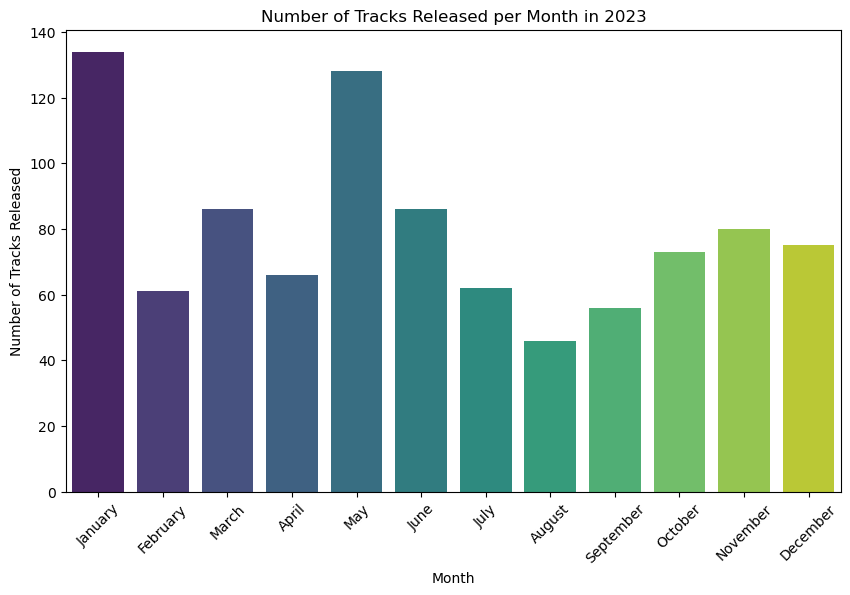

In [17]:
# Count the number of tracks released per month
monthly_releases = spotify_data['released_month'].value_counts().sort_index()

# Plot the number of tracks released per month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_releases.index, y=monthly_releases.values, palette="viridis", hue=None)
plt.title("Number of Tracks Released per Month in 2023")
plt.xlabel("Month")
plt.ylabel("Number of Tracks Released")
plt.xticks(range(0, 12), 
           ['January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'October', 'November', 'December'], 
           rotation=45)
plt.show()

- The bar chart presents the monthly distribution of track releases in 2023. Notably, January and May saw the highest number of releases, suggesting peak periods of activity in the music industry. The chart hints at a potential seasonal trend, with releases declining towards the end of the year. However, a consistent stream of releases is maintained throughout the year. These patterns could be influenced by industry events, listener preferences, and strategic release planning.

#### Genre and Music Characteristics
2. Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?


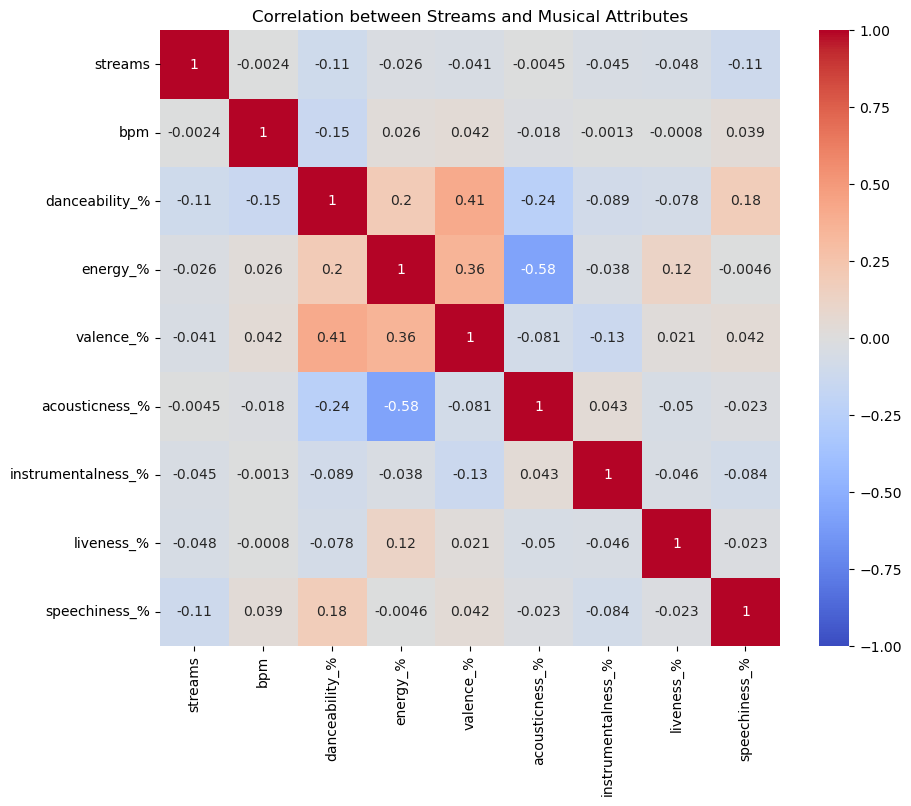

In [20]:
# Convert columns to numeric, forcing errors to NaN
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')
spotify_data['bpm'] = pd.to_numeric(spotify_data['bpm'], errors='coerce')
spotify_data['danceability_%'] = pd.to_numeric(spotify_data['danceability_%'], errors='coerce')
spotify_data['energy_%'] = pd.to_numeric(spotify_data['energy_%'], errors='coerce')
spotify_data['valence_%'] = pd.to_numeric(spotify_data['valence_%'], errors='coerce')
spotify_data['acousticness_%'] = pd.to_numeric(spotify_data['acousticness_%'], errors='coerce')
spotify_data['instrumentalness_%'] = pd.to_numeric(spotify_data['instrumentalness_%'], errors='coerce')
spotify_data['liveness_%'] = pd.to_numeric(spotify_data['liveness_%'], errors='coerce')
spotify_data['speechiness_%'] = pd.to_numeric(spotify_data['speechiness_%'], errors='coerce')

# Select the columns for correlation and drop rows with any NaNs
correlation_data = spotify_data[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].dropna()

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Streams and Musical Attributes')
plt.show()

- When correlating streams to each musical attribute we can see that there is a negative correlation between these datas. Streams correlated with danceability and speechiness seems to have the greater negative correlation while streams correlated with acousticness have the lowest negative correlation. This means that when a song has danceability and speechiness, the streams might be lower than other attributes.

#### Platform Popularity
1. How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

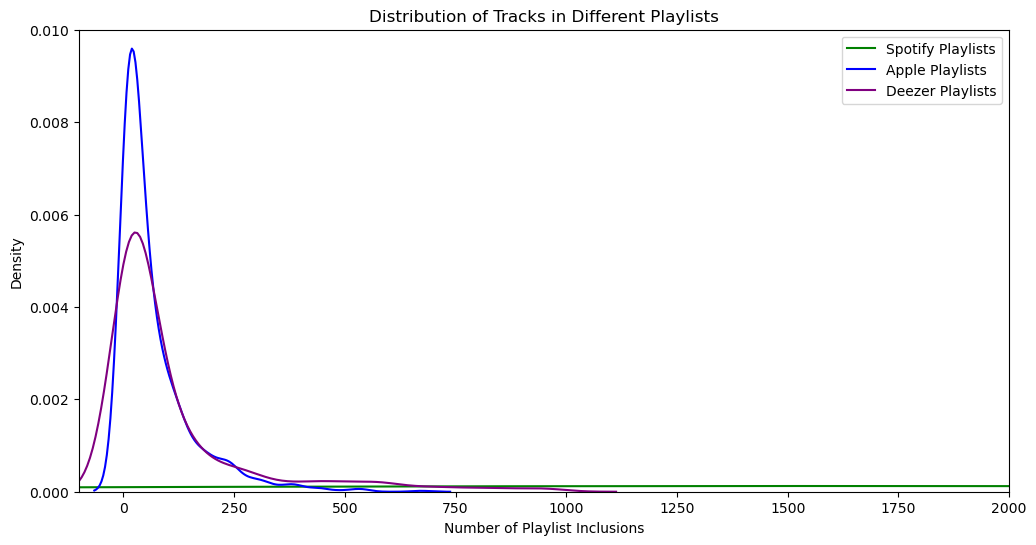

       in_spotify_playlists  in_apple_playlists  in_deezer_playlists
count            953.000000          953.000000           874.000000
mean            5200.124869           67.812172           109.740275
std             7897.608990           86.441493           178.811406
min               31.000000            0.000000             0.000000
25%              875.000000           13.000000            12.000000
50%             2224.000000           34.000000            36.500000
75%             5542.000000           88.000000           110.000000
max            52898.000000          672.000000           974.000000


In [23]:
# Convert 'in_deezer_playlists' to numeric
spotify_data['in_deezer_playlists'] = pd.to_numeric(spotify_data['in_deezer_playlists'], errors='coerce')

# Summary statistics for each playlist platform
playlist_summary = spotify_data[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].describe()

# Plot distributions to compare tracks across platforms
plt.figure(figsize=(12, 6))
sns.kdeplot(spotify_data['in_spotify_playlists'], label="Spotify Playlists", color='green')
sns.kdeplot(spotify_data['in_apple_playlists'], label="Apple Playlists", color='blue')
sns.kdeplot(spotify_data['in_deezer_playlists'].dropna(), label="Deezer Playlists", color='purple')
plt.xlim(-100, 2000)  
plt.ylim(0, 0.01)  
plt.title("Distribution of Tracks in Different Playlists")
plt.xlabel("Number of Playlist Inclusions")
plt.ylabel("Density")
plt.legend()
plt.show()

# Print the summary statistics
print(playlist_summary)

- The provided data reveals a striking disparity in the distribution of track counts across Spotify, Apple Music, and Deezer playlists. Spotify emerges as the platform favoring larger playlists, with a significantly higher mean and median track count. This suggests a user base inclined towards diverse, expansive playlists, perhaps reflecting a preference for serendipitous music discovery and broader listening habits.

- In contrast, Apple Music playlists lean towards a smaller, more curated approach. The lower mean and median track count indicate a user base that prioritizes focused listening experiences and personalized playlists. This could be attributed to factors such as the platform's emphasis on high-quality audio and exclusive content, which might encourage users to create smaller, more selective playlists.

- Deezer positions itself between these two extremes, with a distribution that is less skewed than Spotify but more skewed than Apple Music. This suggests a more balanced approach to playlist curation, catering to both users who prefer larger, genre-based playlists and those who favor smaller, mood-based playlists.

#### Advanced Analysis
1. Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

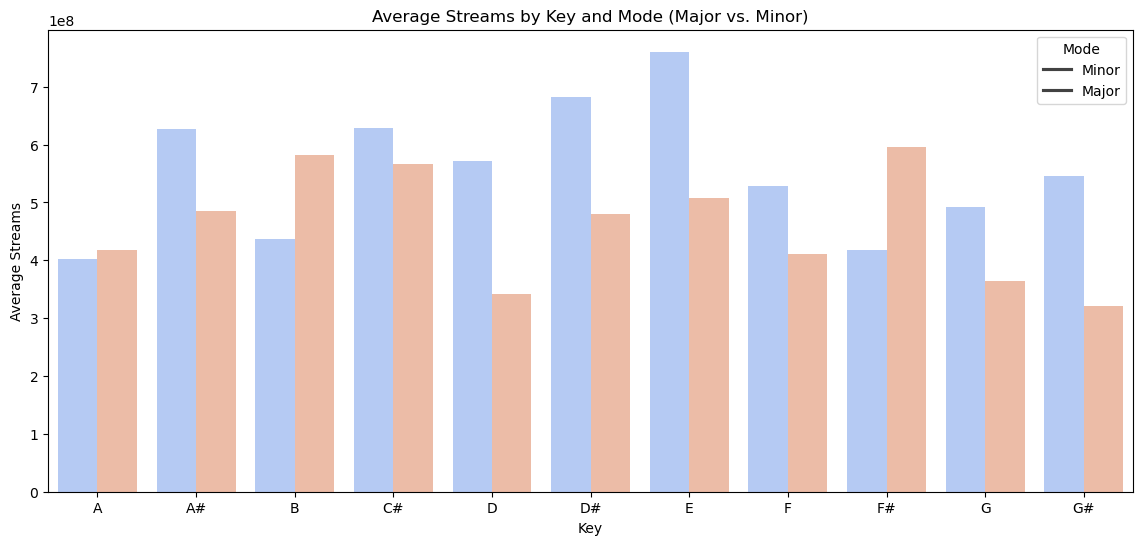

In [26]:
# 1. Calculate the average streams by key and mode
average_streams_by_key_mode = spotify_data.groupby(['key', 'mode'])['streams'].mean().reset_index()

# 2. Plot the average streams by key, separated by mode
plt.figure(figsize=(14, 6))
sns.barplot(data=average_streams_by_key_mode, x='key', y='streams', hue='mode', palette="coolwarm")
plt.title("Average Streams by Key and Mode (Major vs. Minor)")
plt.xlabel("Key")
plt.ylabel("Average Streams")
plt.legend(title="Mode", labels=["Minor", "Major"])
plt.show()

- The provided graph illustrates the average streams of songs categorized by their musical key and mode (major or minor). A striking observation is the dominance of minor keys, which consistently outperform their major counterparts in terms of average streams. This suggests that listeners are drawn to the emotional depth and complexity often associated with minor keys.

- Among the minor keys, E minor and A minor emerge as particularly popular choices, commanding significantly higher average streams. While minor keys generally dominate, certain major keys, such as C major and D major, still manage to attract a considerable audience.

- Several factors could contribute to these trends. The emotional resonance of minor keys, their potential for harmonic complexity, and their alignment with certain genres might all play a role. Additionally, cultural preferences and musical traditions could influence the popularity of specific keys and modes.

2. Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

/var/folders/qh/wcjkvl094jdcznk98824qx9h0000gn/T/ipykernel_87394/1302676464.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists, x='total_playlist_appearances', y='artist(s)_name', palette='viridis')


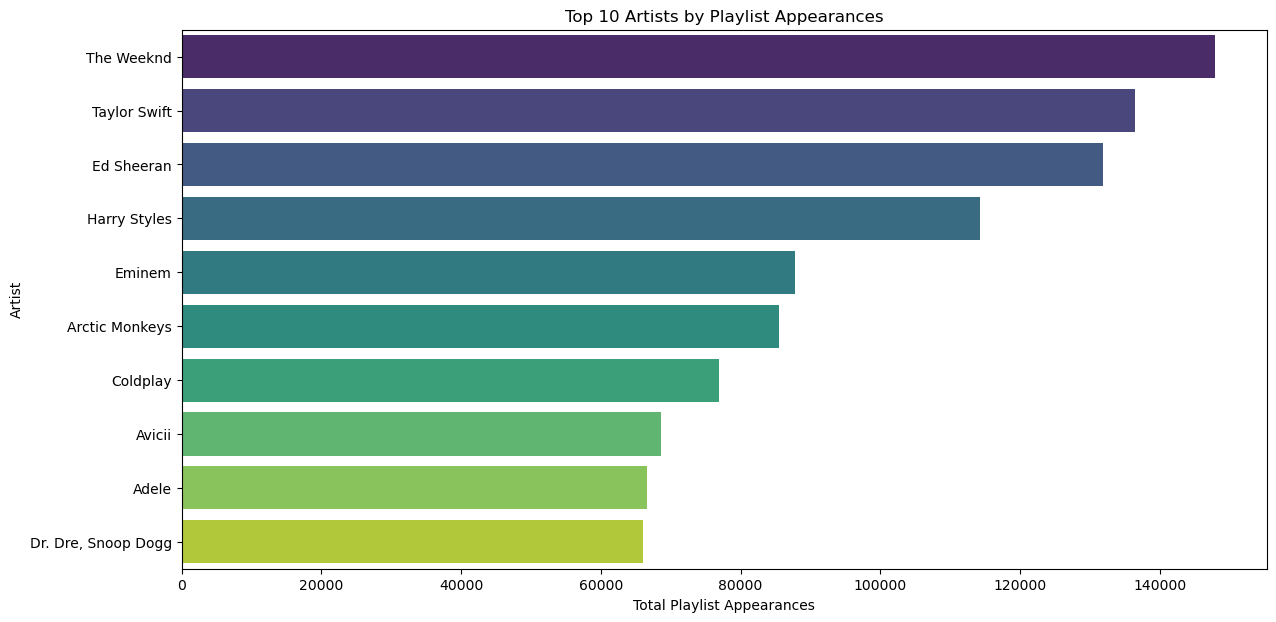

In [29]:
# Ensure playlist columns are numeric for analysis
spotify_data['in_spotify_playlists'] = pd.to_numeric(spotify_data['in_spotify_playlists'], errors='coerce')
spotify_data['in_apple_playlists'] = pd.to_numeric(spotify_data['in_apple_playlists'], errors='coerce')
spotify_data['in_deezer_playlists'] = pd.to_numeric(spotify_data['in_deezer_playlists'], errors='coerce')

# 1. Calculate total playlist appearances for each artist
spotify_data['total_playlist_appearances'] = (
    spotify_data['in_spotify_playlists'].fillna(0) + 
    spotify_data['in_apple_playlists'].fillna(0) + 
    spotify_data['in_deezer_playlists'].fillna(0)
)

# 2. Group by artist and sum the total appearances
artist_playlist_counts = spotify_data.groupby('artist(s)_name')['total_playlist_appearances'].sum().reset_index()

# 3. Sort by total appearances to identify the top artists
top_artists = artist_playlist_counts.sort_values(by='total_playlist_appearances', ascending=False).head(10)

# 4. Plot the top artists based on playlist appearances
plt.figure(figsize=(14, 7))
sns.barplot(data=top_artists, x='total_playlist_appearances', y='artist(s)_name', palette='viridis')
plt.title("Top 10 Artists by Playlist Appearances")
plt.xlabel("Total Playlist Appearances")
plt.ylabel("Artist")
plt.show()

- The graph showcases the top 10 artists based on their frequency of appearance in playlists on a specific music streaming platform. The Weeknd leads the pack, reflecting significant popularity and inclusion in diverse playlists. The list is a mix of contemporary and classic artists, indicating a wide range of musical tastes among playlist curators and listeners. Artists from various genres, such as pop, hip-hop, rock, and electronic, are represented, suggesting that playlist curation extends beyond specific genres. This likely stems from the broad appeal of these artists, their alignment with various playlist themes and moods, and the active engagement of their fanbases in playlist creation. 